In [1]:
# !pip install -q -U ucimlrepo scikit-learn xgboost mlxtend

# скачаем дополнительные файлы необходимые для скрипта
# !wget https://gist.github.com/Kemsekov/ac500f53026b2bbed7699732b4f07b55/raw -O pandas_dataframe_series_encoding.py 
# !wget https://gist.github.com/Kemsekov/ff73d15994598217ef23921b10092a07/raw -O cross_val_classification_report.py
# !wget https://gist.github.com/Kemsekov/19bd3c04757e646e3a1c19d6694e16eb/raw -O render_3d.py

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  

dataset_id = 3
# dataset_id = 193
# dataset_id = 75

# Загрузим датасет 
annealing = fetch_ucirepo(id=dataset_id) 
  
# выгрузим датасет в pandas
X : pd.DataFrame = annealing.data.features 
y = annealing.data.targets 
  
# метадата 
print(annealing.metadata) 
  
# информация о переменных
print(annealing.variables) 

{'uci_id': 3, 'name': 'Annealing', 'repository_url': 'https://archive.ics.uci.edu/dataset/3/annealing', 'data_url': 'https://archive.ics.uci.edu/static/public/3/data.csv', 'abstract': 'Steel annealing data', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 798, 'num_features': 38, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': None, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5RW2F', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "Attribute Listing:\n    1. family:          --,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS\n    2. product-type:    C, H, G\n    3. steel:           -,R,A,U,K,M,S,W,V\n    4. carbon:          continuous\n    5. hardness:        continuous\n    6. temper_rolling:  -,T\n    7. condition:       -,S,A,X\n    8. formabili

In [3]:
# ифнормация о полях показывает что требуется нормализация данных
X.describe()

,carbon,hardness,formability,strength,enamelability,m,marvi,corr,jurofm,s,p,thick,width,len,bore,packing
count,898.000000,898.000000,580.000000,898.000000,16.000,0.0,0.0,0.0,0.0,0.0,0.0,898.000000,898.000000,898.000000,898.000000,9.000000
mean,3.634744,11.776169,2.220690,30.668151,1.625,NaN,NaN,NaN,NaN,NaN,NaN,1.198549,780.653341,1263.094655,28.173719,2.888889
std,13.716845,24.750528,0.672366,114.956243,0.500,NaN,NaN,NaN,NaN,NaN,NaN,0.871208,405.345688,1871.399107,124.560341,0.333333
min,0.000000,0.000000,1.000000,0.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,2.000000,0.000000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,2.000000,0.000000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,610.000000,611.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000,0.000000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,1250.000000,762.000000,0.000000,3.000000
max,70.000000,85.000000,5.000000,700.000000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1525.000000,4880.000000,600.000000,3.000000


In [4]:
# так же некоторые данные требуют замены строковых признаков на числовые
X.head(10)

,famiily,product-type,steel,carbon,hardness,temper-rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN
5,NaN,C,A,0,45,NaN,S,NaN,0,NaN,...,NaN,NaN,NaN,COIL,1.600,610.0,0,NaN,0,NaN
6,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,NaN,SHEET,0.699,610.0,4880,Y,0,NaN
7,NaN,C,A,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,NaN,COIL,3.300,152.0,0,NaN,0,NaN
8,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,NaN,COIL,0.699,1320.0,0,NaN,0,NaN
9,NaN,C,A,0,0,NaN,S,3.0,0,N,...,NaN,NaN,NaN,SHEET,1.000,1320.0,762,NaN,0,NaN


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   famiily                 126 non-null    object 
 1   product-type            898 non-null    object 
 2   steel                   812 non-null    object 
 3   carbon                  898 non-null    int64  
 4   hardness                898 non-null    int64  
 5   temper-rolling          137 non-null    object 
 6   condition               595 non-null    object 
 7   formability             580 non-null    float64
 8   strength                898 non-null    int64  
 9   non-ageing              105 non-null    object 
 10  surface-finish          9 non-null      object 
 11  surface-quality         654 non-null    object 
 12  enamelability           16 non-null     float64
 13  bc                      1 non-null      object 
 14  bf                      129 non-null    ob

In [6]:
import pandas as pd
#выведем сколько у нас имеется отсутствующих признаков
print("Count of missing values")
missing_count : pd.Series = X.isna().mean().sort_values(ascending=False)
missing_count

Count of missing values


marvi                     1.000000
s                         1.000000
p                         1.000000
corr                      1.000000
jurofm                    1.000000
m                         1.000000
bc                        0.998886
exptl                     0.997773
blue/bright/varn/clean    0.993318
phos                      0.992205
packing                   0.989978
surface-finish            0.989978
enamelability             0.982183
chrom                     0.971047
ferro                     0.966592
lustre                    0.943207
oil                       0.928731
bt                        0.917595
cbond                     0.917595
non-ageing                0.883073
famiily                   0.859688
bf                        0.856347
temper-rolling            0.847439
bl                        0.834076
bw/me                     0.765033
formability               0.354120
condition                 0.337416
surface-quality           0.271715
steel               

In [7]:
# какие у нас классы и как они распределены?
# выведем кол-во классов и видим что выборка очень несбалансирована
print("counts:")
y.value_counts()
# т.к классы несбалансированны, то при обучении нужно будет разделять выборки балансированно, и(или) удалить классы, и(или) 
# сделать oversampling

counts:


class
3        684
2         99
5         67
U         40
1          8
Name: count, dtype: int64

In [8]:
#Удалим признаки с 20%+ отсутствующими значениями
to_remove = missing_count[missing_count>0.2]
X_cleaned = X.drop(columns=to_remove.axes[0])
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  898 non-null    object 
 1   steel         812 non-null    object 
 2   carbon        898 non-null    int64  
 3   hardness      898 non-null    int64  
 4   strength      898 non-null    int64  
 5   shape         898 non-null    object 
 6   thick         898 non-null    float64
 7   width         898 non-null    float64
 8   len           898 non-null    int64  
 9   bore          898 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 70.3+ KB


In [9]:
# когда мы удалили ненужные признаки, заменяем строки на числа.
# Используем уже готовое решение чтоб строковые признаки на их соответствующии категории
from pandas_dataframe_series_encoding import one_hot_encode, label_encode

non_class_columns = X_cleaned.columns
classes,mapping = label_encode(y)
X_encoded = label_encode(X_cleaned[non_class_columns])[0]
X_encoded.head(10)

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,0,0,8,0,0,0,0.700,610.0,0,0
1,0,3,0,0,0,0,3.200,610.0,0,0
2,0,3,0,0,0,1,0.700,1300.0,762,0
3,0,0,0,60,0,0,2.801,385.1,0,0
4,0,0,0,60,0,1,0.801,255.0,269,0
5,0,0,0,45,0,0,1.600,610.0,0,0
6,0,3,0,0,0,1,0.699,610.0,4880,0
7,0,0,0,0,0,0,3.300,152.0,0,0
8,0,3,0,0,0,0,0.699,1320.0,0,0
9,0,0,0,0,0,1,1.000,1320.0,762,0


In [10]:
# Делаем нормализацию данных используя StandardScaler, чтоб создать фичи с mean = 0, std=1
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)
X_normalized=pd.DataFrame(X_normalized,columns=X_encoded.columns)
X_normalized.describe()

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
count,898.0,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02
mean,0.0,-3.560626e-17,-1.681407e-17,-1.384688e-17,3.956251e-17,-9.495003e-17,-1.384688e-17,3.560626e-17,-5.934377e-18,-7.714690e-17
std,0.0,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00
min,0.0,-8.256132e-01,-2.651316e-01,-4.760598e-01,-2.669298e-01,-1.086099e+00,-1.100866e+00,-1.926968e+00,-6.753228e-01,-2.263114e-01
25%,0.0,-8.256132e-01,-2.651316e-01,-4.760598e-01,-2.669298e-01,-1.086099e+00,-6.862676e-01,-4.214884e-01,-6.753228e-01,-2.263114e-01
50%,0.0,-3.882087e-01,-2.651316e-01,-4.760598e-01,-2.669298e-01,9.207261e-01,-4.577219e-01,-4.212415e-01,-3.486472e-01,-2.263114e-01
75%,0.0,4.866004e-01,-2.651316e-01,-4.760598e-01,-2.669298e-01,9.207261e-01,4.610547e-01,1.158538e+00,-2.679139e-01,-2.263114e-01
max,0.0,2.236218e+00,4.840927e+00,2.960124e+00,5.825737e+00,9.207261e-01,3.217385e+00,1.837349e+00,1.933805e+00,4.593315e+00


In [11]:
#т.к у класса 1 очень мало примеров, а остальные классы очень несбалансированны, то используем imblearn чтоб сымитировать данные классы
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto")
X_ov,y_ov = smote.fit_resample(X_normalized,classes)

# allowed_class_mask = ~(y=='1').to_numpy().flatten()
# X=X[allowed_class_mask]
# y=y[allowed_class_mask]

y_ov.value_counts()

class
0        684
1        684
2        684
3        684
4        684
Name: count, dtype: int64

In [12]:
import numpy as np
def generate_colors_for_classification(y : np.ndarray,seed=42):
    """Returns a color-representation of array y, where each unique class replaced with color"""
    y=np.array(y)
    classes = np.sort(np.unique(y))
    np.random.seed(seed)
    colors = np.random.uniform(0,1,size=(len(classes),3))
    results = np.zeros((len(y),3))
    def color_scale(x): 
        minx = np.min(x,axis=0)
        maxx = np.max(x,axis=0)
        scale = 1/(maxx-minx)
        return ((x - minx)*scale * 255).astype(int)

    for cls,color in zip(classes,colors):
        mask = (y==cls).reshape(len(y))
        results[mask]=color
    return color_scale(results)

In [13]:
# сделаем рендер данных, используя PCA чтоб сделать отображение фич в 3 измерения.
# для того чтоб визуально оценить
from sklearn.decomposition import KernelPCA, PCA
from render_3d import plot_3d_rgb
from umap import UMAP
class_colors = generate_colors_for_classification(classes)

pca = PCA(n_components=3)
X_zip = pca.fit_transform(X_normalized)
print("Доля объясненой дисперсии",pca.explained_variance_ratio_)
print("Суммарая доля объясненой дисперсии",sum(pca.explained_variance_ratio_))
data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
plot_3d_rgb(data1,"PCA classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])


class_colors_ov = generate_colors_for_classification(y_ov)
X_zip = pca.transform(X_ov)
data1 = np.concatenate([X_zip[:,:3],class_colors_ov],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors_ov],axis=1)
plot_3d_rgb(data1,"PCA classes render 1,2,3 dimensions of SMOTE",["ax1","ax2","ax3"])


pca = KernelPCA(n_components=3,kernel="rbf")
X_zip = pca.fit_transform(X_normalized)
data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
plot_3d_rgb(data1,"RBF KPCA classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])


X_zip = pca.transform(X_ov)
data1 = np.concatenate([X_zip[:,:3],class_colors_ov],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors_ov],axis=1)
plot_3d_rgb(data1,"RBF KPCA classes render 1,2,3 dimensions of SMOTE",["ax1","ax2","ax3"])

umap = UMAP(n_components=3,n_neighbors=100,min_dist=1)
X_zip = umap.fit_transform(X_normalized)
data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
plot_3d_rgb(data1,"UMAP classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])


X_zip = umap.transform(X_ov)
data1 = np.concatenate([X_zip[:,:3],class_colors_ov],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors_ov],axis=1)
plot_3d_rgb(data1,"UMAP classes render 1,2,3 dimensions of SMOTE",["ax1","ax2","ax3"])


/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Доля объясненой дисперсии [0.23292948 0.15801333 0.14054515]
Суммарая доля объясненой дисперсии 0.5314879506666234


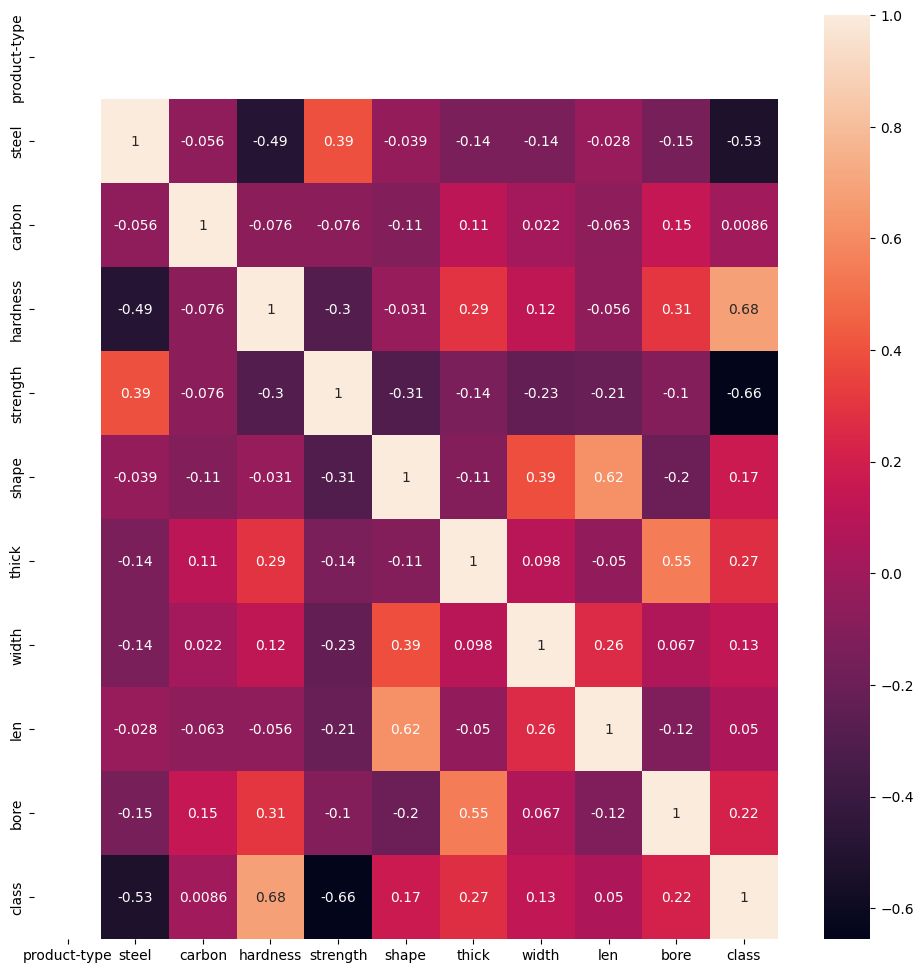

In [14]:
# Т.к признаков получилось много и данные очень неравномерно разделены, то все основные графики
# выглядят неинформативно, только матрица корреляций +- читабельная, да и то особо не дает полезной информации
from matplotlib import pyplot as plt
import seaborn as sns

dataset = X_ov.copy()
dataset['class'] = y_ov
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()
#Видно что поля steel_N(тип стали) hardness и strength имеют наибольшее влияние на класс

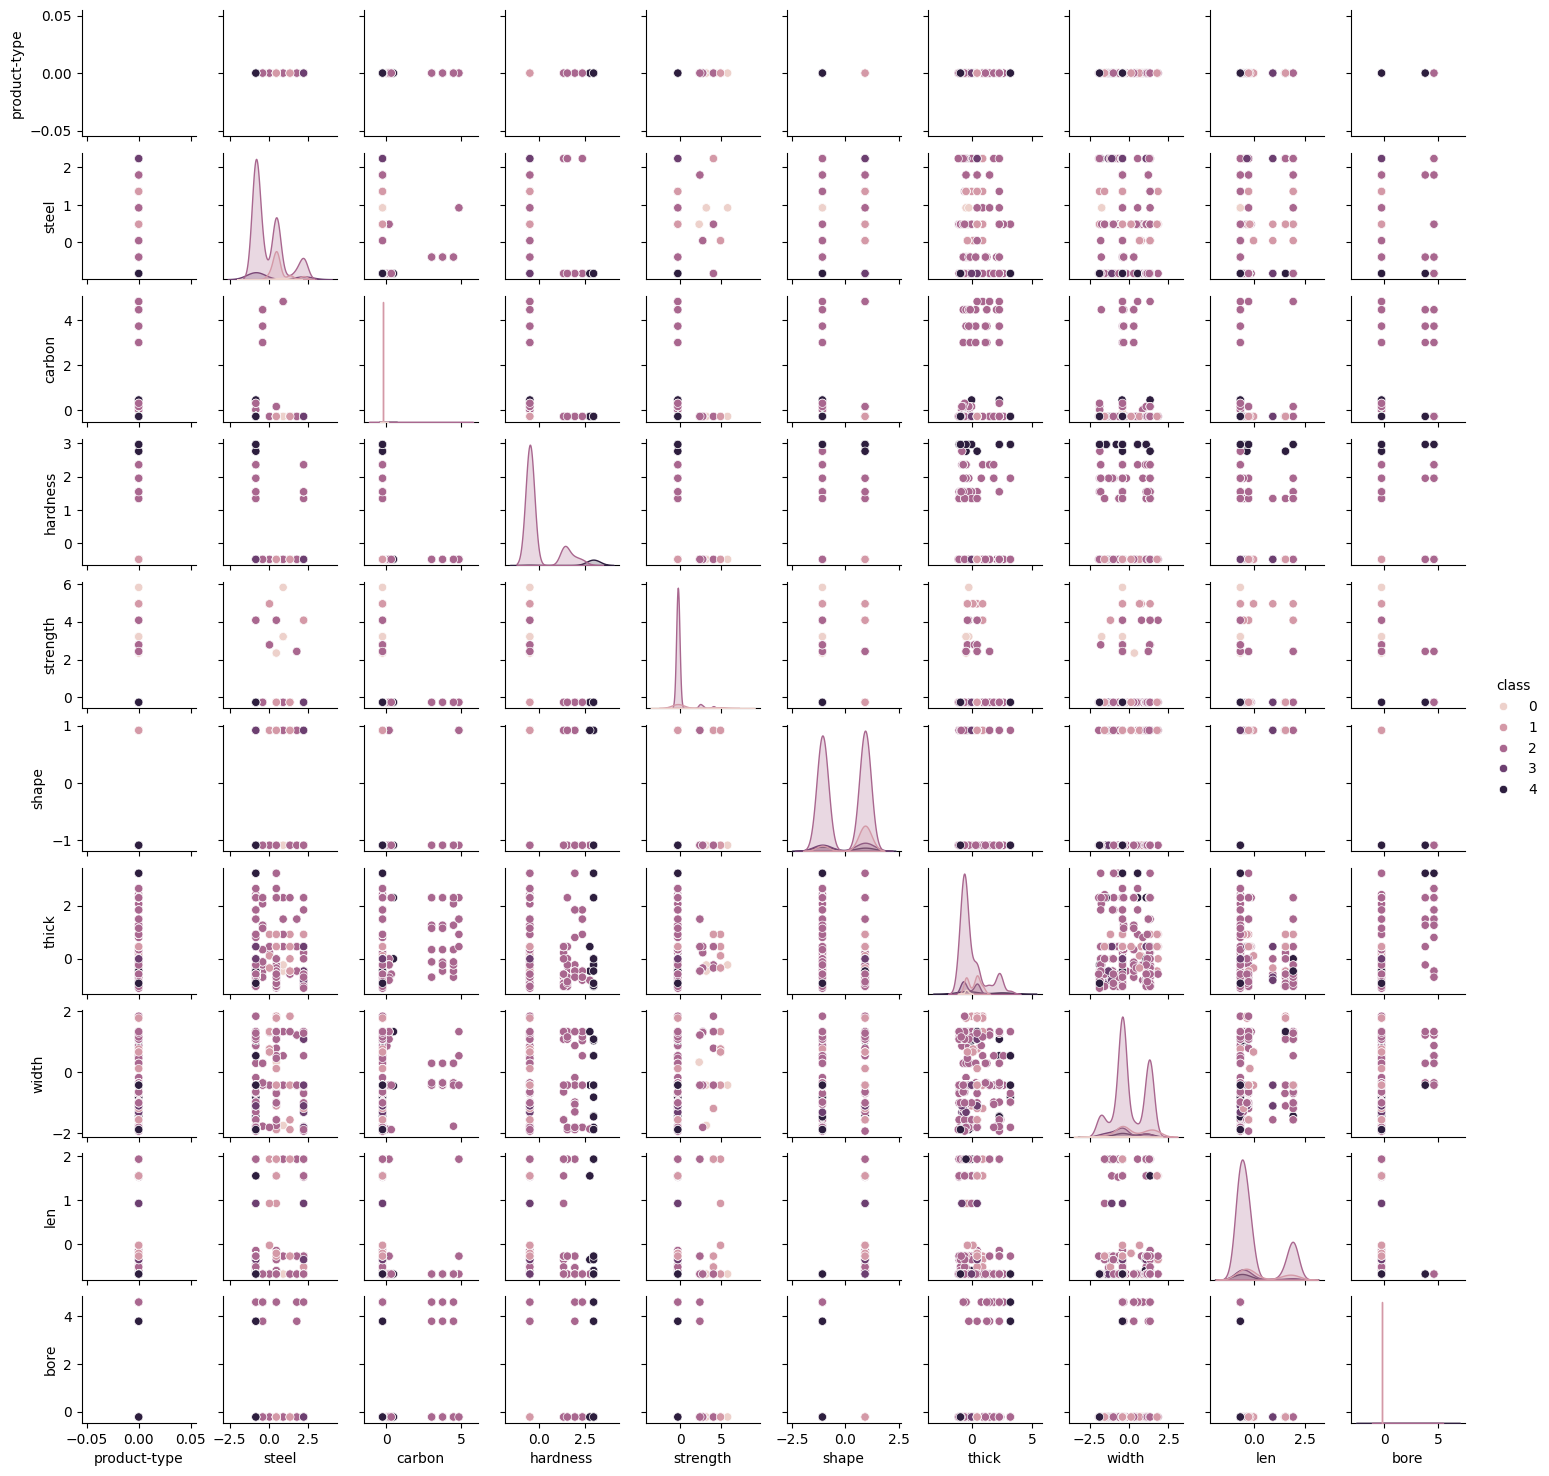

In [15]:
classes_count = len(classes['class'].unique())
concat = pd.concat([X_normalized,classes],axis=1)
sns.set_palette('Set2')
sns.pairplot(concat,hue='class',height=1.5)

In [16]:
# Делать разделение на обучающие и тестовые выборки не будем, т.к будем использовать кросс-валидацию
# и т.к мы будем использовать кросс-валидацию, определим параметры по которым будет происходить поиск
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


def LogisticRegression_search_params():
    params = {
        'penalty': ['l2'], #'elasticnet'
        'C': [0.001, 0.01, 0.1, 1.0, 10.0],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    }
    return params

def LDA_search_params():
    params = {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
    }
    return params

def GaussianNB_search_params():
    params = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
    return params

def KNeighbors_search_params():
    params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    return params

def SVC_search_params():
    params = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
    return params

def DecisionTree_search_params():
    params = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }
    return params

def XGB_search_params():
    params = {
        'max_depth':        [2,4,6,8,10],
        'colsample_bytree': [1, 0.8, 0.6, 0.4],
        'min_child_weight': [1,2,5,7],
        'gamma':            [0,2,5,15],
        'eta':              [0.1,0.3,0.5],
        'lambda':           [0.2,1,2]
    }
    return params

models = []
models.append(('LR', LogisticRegression(),LogisticRegression_search_params()))
models.append(('LDA', LinearDiscriminantAnalysis(),LDA_search_params()))
models.append(('KNN', KNeighborsClassifier(),KNeighbors_search_params()))
models.append(('CART', DecisionTreeClassifier(),DecisionTree_search_params()))
models.append(('NB', GaussianNB(),GaussianNB_search_params()))
models.append(('SVC', SVC(),SVC_search_params()))
models.append(('XGB', XGBClassifier(),XGB_search_params()))

In [17]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from cross_val_classification_report import cross_val_classification_report

# для кросс-валидации обучаем найденнуб модель на 9/10 частях данных, валидируем на оставшейся 1/10 части данных,
# так делаем со всеми частями данных во взаимноисключающем множестве(всего 10 раз)
# потом перемешываем данные, и повторяем этот процесс 3 раза
# таким образом мы получим крайне адекватную и даже чрезмерно надежную метрику предсказательной способности модели
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
results = {}

for name,model,params in models:
    print(f"SEARCHING FOR {name} PARAMETERS...")
    # для обучения используем насыщенные данные, для тестирования исходные
    search = RandomizedSearchCV(
        model,
        params,
        n_iter=100,
        cv=5,
        random_state=0,
        n_jobs=6,
    )
    search.fit(X_ov,y_ov)
    best=search.best_estimator_
    report = cross_val_classification_report(
        model=best,
        X=np.array(X_normalized),
        y=np.array(classes['class']),
        cv=cv
    )
    results[name]=(best,report)


SEARCHING FOR LR PARAMETERS...


/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A colum

SEARCHING FOR LDA PARAMETERS...


/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of p

SEARCHING FOR KNN PARAMETERS...


/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/neighbors/_classif

SEARCHING FOR CART PARAMETERS...


/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation

SEARCHING FOR NB PARAMETERS...
SEARCHING FOR SVC PARAMETERS...


/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/sklearn/utils/validatio

In [17]:
# повторюсь, по причине того что все значения метрик рапорта классификаторов 
# посчитаны исключительно на непересекающихся с тренеровочными, тестирующих множествах,
# при многократном изменении обучающей и тестирующей подвыборки, так
# мы получаем совершенно адеквтную и надежную оценку качества модели, и числам, 
# # которые получаются здесь ниже точно можно доверять,
# и их должно быть достаточно чтоб вырать лучшую модель
for name in results:
    model,report = results[name]
    print("REPORT FOR MODEL",name)
    print(report)

REPORT FOR MODEL LR
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        24
           1       0.49      0.14      0.22       297
           2       0.81      0.98      0.88      2052
           3       0.00      0.00      0.00       201
           4       0.94      0.90      0.92       120

    accuracy                           0.80      2694
   macro avg       0.65      0.48      0.51      2694
weighted avg       0.72      0.80      0.74      2694

REPORT FOR MODEL LDA
              precision    recall  f1-score   support

           0       0.13      0.62      0.21        24
           1       0.10      0.02      0.03       297
           2       0.81      0.92      0.86      2052
           3       0.00      0.00      0.00       201
           4       0.61      0.95      0.74       120

    accuracy                           0.75      2694
   macro avg       0.33      0.50      0.37      2694
weighted avg       0.65      0.75   

['width', 'thick', 'len', 'steel', 'strength', 'hardness', 'carbon', 'shape']

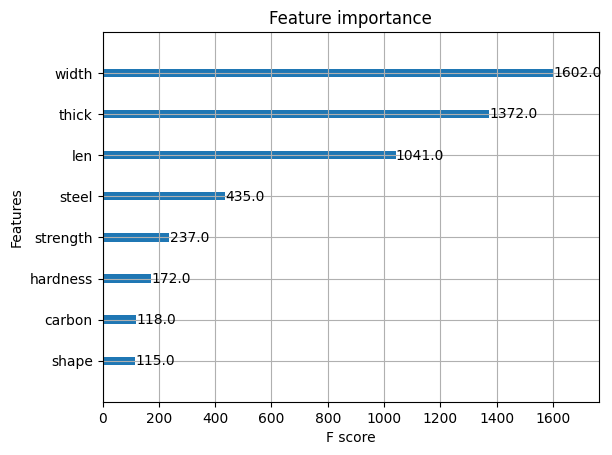

In [18]:
# Выведем важность каждой из фич чтоб понять по каким фичам лучше делат рендер
from xgboost import plot_importance
best_model : XGBClassifier = results["XGB"][0]
booster = best_model.get_booster()

# назначаем имена фичам и достаем их важность из XGB модели
booster.feature_names = X_normalized.columns.tolist()

importance = booster.get_score(importance_type="weight", fmap="")
plot_importance(best_model)
important_features = sorted(importance, key=importance.get, reverse=True)
important_features

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



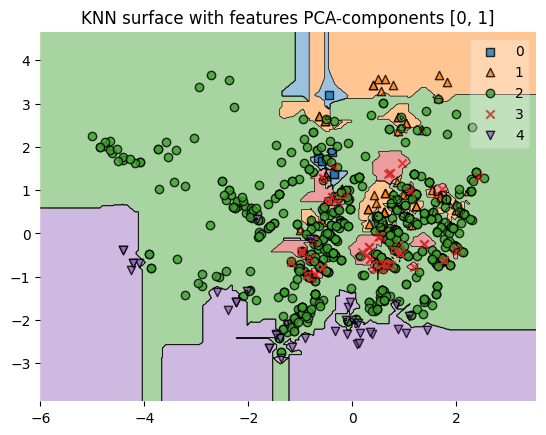

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



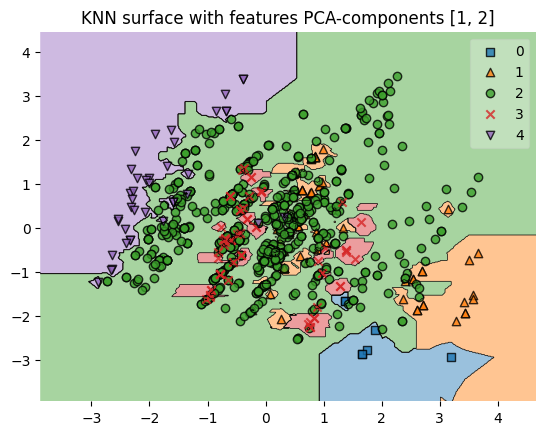

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



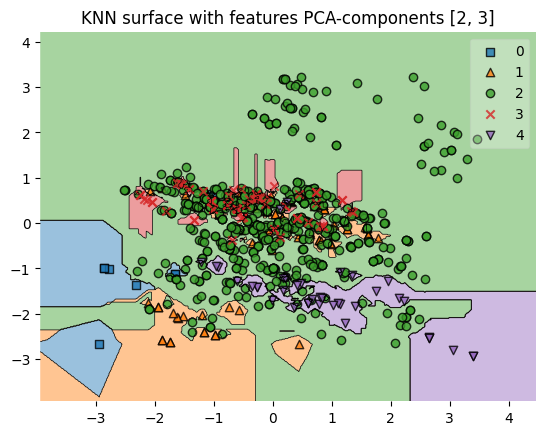

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



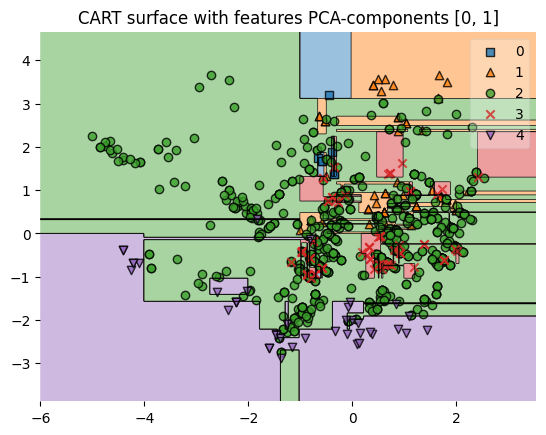

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



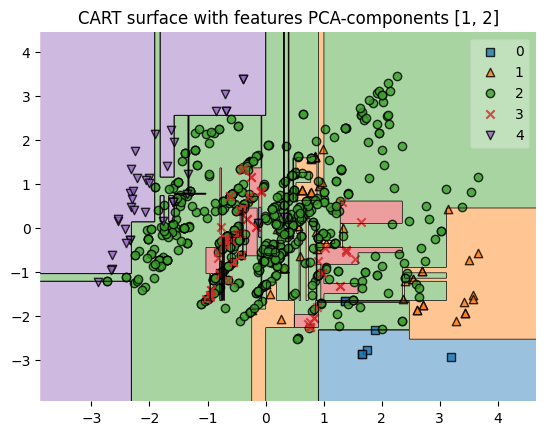

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



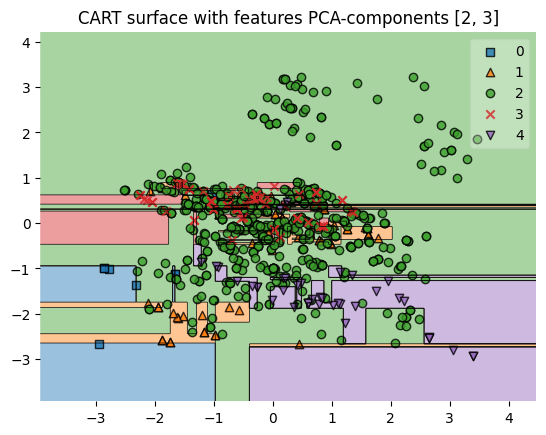

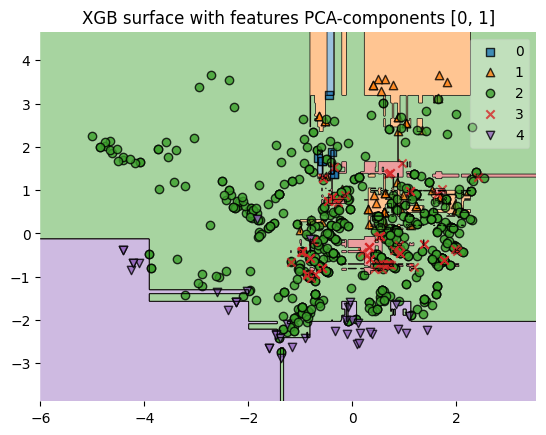

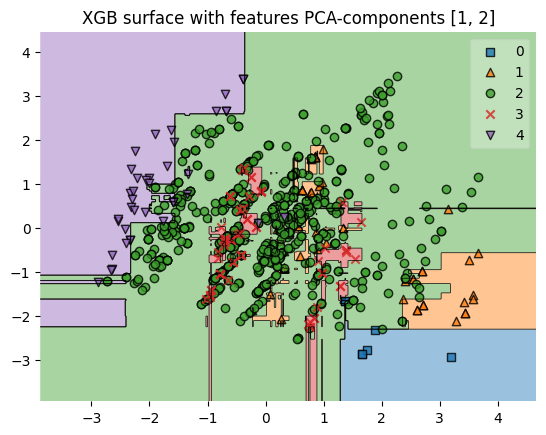

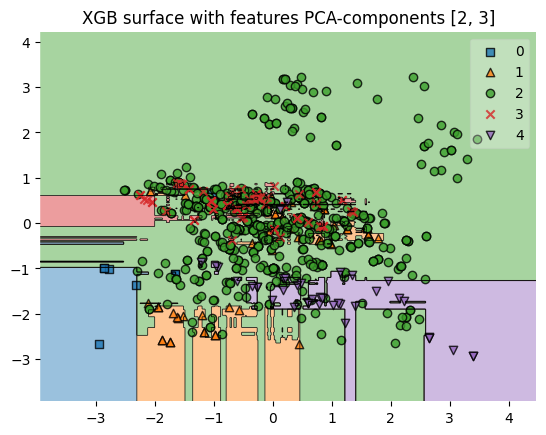

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



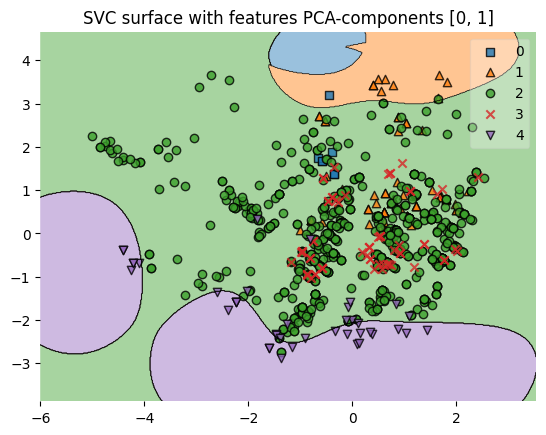

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



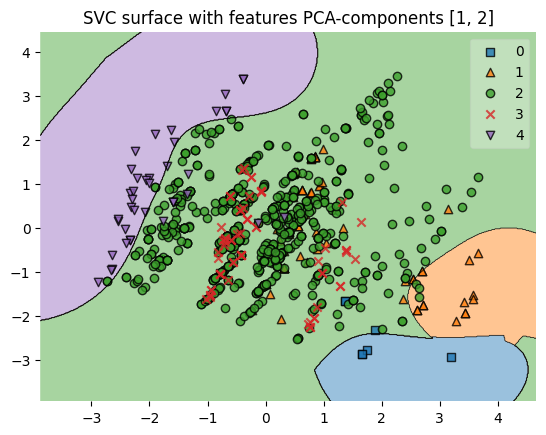

/home/vlad/Programs/Git/python-experements/venv/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



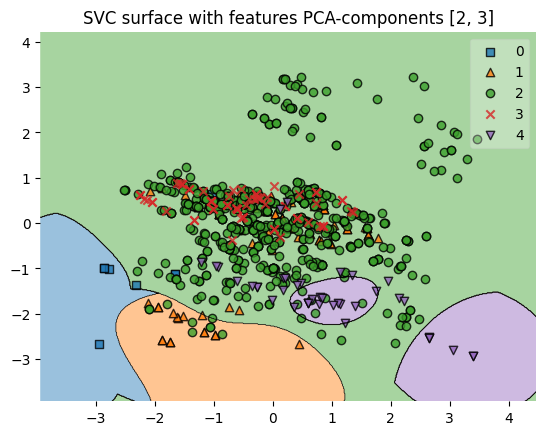

In [68]:
# К сожалению, даже на этих самых важных фичах при попытке нарисовать графики работы классификатора по ним
# мы натыкаемся на проблему высокой сложности данных, так как среза данных по двум измерениям
# не хватает, чтоб отобразить адекватно области распределенния
# классов, и получается некрасивые графики.
# По этой причине, для того чтоб графики были более информативны, мы делаем срез по PCA-компонентам данных, таким образом,
# мы получим более информативный график
from mlxtend.plotting import plot_decision_regions
import copy

X_important = X_normalized[important_features[:6]]

selected_models = ["KNN","CART","XGB","SVC"]

pca = PCA(n_components=4)
X_zip = pca.fit_transform(X_normalized)

important_features_pairs = [
	[0, 1],
	[1,	2],
	[2,	3],
]

for selected_model in selected_models:
	for features_pair in important_features_pairs:
		y_s = classes['class']
		X_2d= X_zip[:,features_pair]
		y_2d = y_s.values
		
		model = copy.deepcopy(results[selected_model][0])
		model.fit(X_2d,y_2d)

		plt.title(f'{selected_model} surface with features PCA-components {features_pair}')
		plot_decision_regions(
				X=X_2d,
				y=y_2d,	
				clf=model)
		plt.show()